In [1]:
# Libs Necessárias
import yfinance as yf
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Utilizando parametros de inicio e fim de intervalo
Acao_Petro = web.get_data_yahoo( 'PETR3.SA', start='2020-01-01' )['Close'].values
Acao_Magalu = web.get_data_yahoo( 'MGLU3.SA', start='2020-01-01' )['Close'].values
Acao_Cielo = web.get_data_yahoo( 'CIEL3.SA', start='2020-01-01' )['Close'].values
Acao_Totvs = web.get_data_yahoo( 'TOTS3.SA', start='2020-01-01' )['Close'].values
Acao_Ambev = web.get_data_yahoo( 'ABEV3.SA', start='2020-01-01' )['Close'].values
Acao_Suzano = web.get_data_yahoo( 'SUZB3.SA', start='2020-01-01' )['Close'].values
Acao_B3 = web.get_data_yahoo( 'B3SA3.SA', start='2020-01-01' )
Acao_Alpagartas = web.get_data_yahoo( 'ALPA4.SA', start='2020-01-01' )['Close'].values

In [2]:
# Organizando os dados em um Dicionario
Dicionario = {
   'x': Acao_B3.index,
    'B3' : Acao_B3['Close'].values,
    'Petobras' : Acao_Petro,
    'Magalu' : Acao_Magalu,
    'Cielo' : Acao_Cielo,
    'Totvs' : Acao_Totvs,
    'Ambev' : Acao_Ambev,
    'Suzano' : Acao_Suzano,
    'Alpagartas' : Acao_Alpagartas
}



In [3]:
Dados = pd.DataFrame(data=Dicionario)

In [4]:
Dados.head()



,x,B3,Petobras,Magalu,Cielo,Totvs,Ambev,Suzano,Alpagartas
0,2020-01-02,15.036666,32.799999,12.3325,8.57,23.049999,19.200001,40.790001,32.580002
1,2020-01-03,14.603333,31.990000,12.2225,8.46,23.540001,18.930000,40.650002,32.580002
2,2020-01-06,14.463333,33.029999,12.2325,8.25,23.003332,19.020000,40.580002,32.070000
3,2020-01-07,14.930000,32.580002,12.1975,8.01,23.100000,19.059999,41.099998,32.799999
4,2020-01-08,14.890000,32.049999,12.5725,7.83,22.790001,18.969999,43.150002,33.160000


In [5]:
Dados = Dados.set_index('x')
Dados.shape

(479, 8)

In [6]:

Dados.head()

,B3,Petobras,Magalu,Cielo,Totvs,Ambev,Suzano,Alpagartas
x,,,,,,,,
2020-01-02,15.036666,32.799999,12.3325,8.57,23.049999,19.200001,40.790001,32.580002
2020-01-03,14.603333,31.990000,12.2225,8.46,23.540001,18.930000,40.650002,32.580002
2020-01-06,14.463333,33.029999,12.2325,8.25,23.003332,19.020000,40.580002,32.070000
2020-01-07,14.930000,32.580002,12.1975,8.01,23.100000,19.059999,41.099998,32.799999
2020-01-08,14.890000,32.049999,12.5725,7.83,22.790001,18.969999,43.150002,33.160000


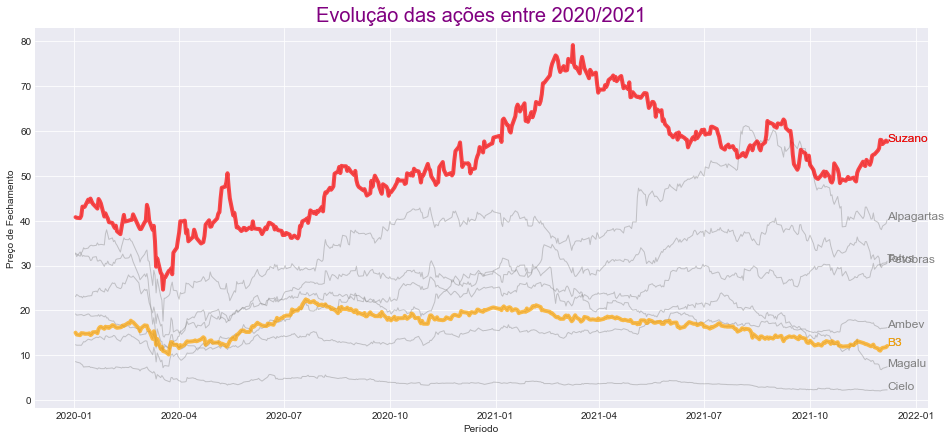

<Figure size 432x288 with 0 Axes>

In [7]:
# Change the style of plot
plt.style.use('seaborn-darkgrid')

# definindo parametro para os dados
df = Dados

# setando o tamanho da figura
plt.figure( figsize=(16, 7))
 
# Plotando diversas ações
for Coluna in df.columns:
    
    # Plotando a ação espeficifico
    plt.plot( df.index, df[Coluna], marker='', color='grey', linewidth=1, alpha=0.4)
    # Incluindo nome no final do gráfico
    plt.text( df.index[-1] , df[Coluna].tail(1), Coluna, horizontalalignment='left', size='large', color='grey')

# Plotando a ação da B3 para ficar destacada
plt.plot( df.index, df['B3'], marker='', color='orange', linewidth=4, alpha=0.7)

# Plotando o nome da B3 no gráfico
plt.text( df.index[-1] , df.B3.tail(1), 'B3', horizontalalignment='left', size='large', color='orange')


# Plotando a ação da Suzano para ficar destacada > maior variação
plt.plot( df.index, df['Suzano'], marker='', color='red', linewidth=4, alpha=0.7)

# Plotando o nome da Suzano no gráfico
plt.text( df.index[-1] , df.Suzano.tail(1), 'Suzano', horizontalalignment='left', size='large', color='red')


# Definindo o titulo
plt.title( 'Evolução das ações entre 2020/2021', 
          loc='center', fontsize=20, fontweight=0, color='purple')

# Definindo os Labels
plt.xlabel('Período')
plt.ylabel('Preço de Fechamento')

# Mostrando o gráfico
plt.show()

plt.savefig('Comparações de Ações.png', format='png')